<a href="https://colab.research.google.com/github/lucasprovenzano/PythonForFinances/blob/main/Python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [13]:
# Defining date frame and reading data from Yahoo Finance. 
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

df = web.DataReader('TSLA', 'yahoo', start, end)

In [ ]:
# Writing and reading data in a csv file. 

df.to_csv('filename.csv')
df.read_csv('filename.csv', parse_dates=True, index_col=0)

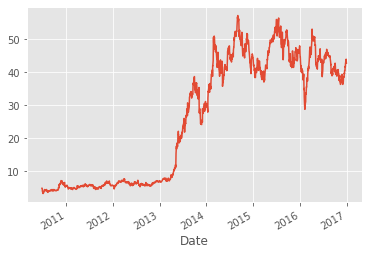

In [14]:
# Plotting the data. 
style.use('ggplot')
df['Adj Close'].plot()